### 程式
* 第2題：.durbin_watson 檢定
* 第3題：找不到現成function
* 第6題：做LR test
* 第題：

### 文本
* 第1題：看正負號、顯不顯著
* 第4題：虛無假設是同質性
* 第5題：看係數正負號變了甚麼

**Process:**
* Load and check data
* Answer each question (11 in total)
 
**Notations:**

*logitdata.sas7bdat*
* Y: distress dummy, Y=1 if the firm is delisted for financial reasons.
* PERMNO: firm id.
* FYEAR: fiscal year for each firm
* ROA: return on total assets (NI/TA in Shumway (2001)).
* CR: current ratio.
* DR: debt to total assets ratio (TL/TA in Shumway (2001)).
* ATTNVR: toatal asset turnover.
* CFAT: cash flow to total assets ratio.
* RSize: logarithm of the relative size of firm i to the total market, evaluated with market capitalization in June each year.
* Sigma: idiosyncratic standard deviation of firm i’s stock returns.
* ExcessRet: excess return of each firm in the previous year.

Logit and probit differ in how they define f (*). The logit model uses something called the cumulative distribution function of the logistic distribution. The probit model uses something called the cumulative distribution function of the standard normal distribution to define f (*). Both functions will take any number and rescale it to fall between 0 and 1.

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from linearmodels.panel import PanelOLS
from linearmodels.panel import RandomEffects
%matplotlib inline

# Load and check data

In [2]:
data = pd.read_sas("logitdata.sas7bdat")

In [3]:
data.head()

,PERMNO,FYEAR,Y,RSize,ExRET,Sigma,ROA,DR,CR,ATTNVR,CFAT
0,10000.0,1986.0,0.0,-13.164594,-0.119453,0.051617,-0.345154,0.802364,0.994509,0.485106,0.164539
1,10001.0,1987.0,0.0,-12.739901,-0.013319,0.037074,0.026506,0.543879,0.943016,1.412030,0.061932
2,10001.0,1988.0,0.0,-12.565416,0.014090,0.036658,0.048061,0.530294,1.049102,1.446783,0.063400
3,10001.0,1989.0,0.0,-12.546597,0.000886,0.031841,0.065069,0.659521,1.312661,1.234043,0.063399
4,10001.0,1990.0,0.0,-12.317335,0.024311,0.023497,0.059901,0.619776,1.571113,1.230178,0.071818


# Answer each question (11 in total)

### 1. Estimate the linear probability model to show the signs of the parameters of these independent variables. Do you think they all have the expected sign?

In [4]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

In [5]:
Y = data["Y"]
X = data[['RSize', 'ExRET', 'Sigma', 'ROA', 'DR', 'CR', 'ATTNVR', 'CFAT']]

X = add_constant(X)
linear_probability_model = OLS(Y, X, missing="drop")
linear_probability_model_result = linear_probability_model.fit()

pd.DataFrame(linear_probability_model_result.params, columns=["coffecient"]).T

,const,RSize,ExRET,Sigma,ROA,DR,CR,ATTNVR,CFAT
coffecient,-0.007014,-0.00015,-0.018603,0.064371,-0.00729,0.007186,0.00015,0.000357,-0.00054


In [6]:
print(linear_probability_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     230.4
Date:                Sun, 23 Dec 2018   Prob (F-statistic):               0.00
Time:                        08:33:04   Log-Likelihood:             3.1235e+05
No. Observations:              159623   AIC:                        -6.247e+05
Df Residuals:                  159614   BIC:                        -6.246e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0070      0.001    -12.135      0.0

### 2. Please test residuals of the linear probability model for autocorrelation at the 5% significance level with the Durbin-Watson test.

In [7]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(linear_probability_model_result.resid)

1.990721489996736

### 3. No matter you find the correlation coefficient is significant or not, please correct for the autocorrelation in the regression. One popular approach is called Cochrane-Orchutt method, which is very close to the GLS approach we discussed in class. If it is not a choice, you can try Yule-Walker method.

In [8]:
import statsmodels.api as sm
sm.regression.yule_walker(Y, order=4, method="mle")

C:\Users\andy5\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(array([ 0.00411397, -0.00119896, -0.00117082, -0.0011772 ]),
 0.034389140223526821)

In [9]:
from statsmodels.tsa.stattools import pacf
pacf(linear_probability_model_result.resid, method="ols")

array([  1.00000000e+00,   4.63903177e-03,  -1.45363516e-03,
        -1.09976959e-03,  -1.05521250e-03,  -1.56311234e-03,
        -9.13261076e-04,  -1.03642400e-03,  -4.44394004e-04,
        -6.16383756e-04,  -7.57825278e-04,   9.80306063e-03,
        -9.47060951e-04,  -1.19913379e-03,  -1.45395328e-03,
        -1.09410337e-03,  -1.01117387e-03,  -9.82841025e-04,
        -1.10530289e-03,  -9.12960904e-04,  -6.63694910e-04,
        -4.81887869e-04,  -1.08097861e-03,  -8.39249740e-04,
        -1.28838169e-03,  -1.25081565e-03,  -1.25869649e-03,
        -1.01581634e-03,  -8.52807510e-04,  -9.17483792e-04,
         3.65786167e-03,  -1.73333308e-03,  -1.41553181e-03,
         4.41618510e-03,   3.53499531e-03,  -1.62123306e-03,
        -1.19602195e-03,  -8.88013469e-04,  -1.34227222e-03,
        -1.13447215e-03,  -9.41588924e-04])

https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.yule_walker.html
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.GLS.html

### 4. Please report the robust estimators of the linear probability model. Since the dependent variable is qualitative, we expect to see heteroskedasticity here.

In [10]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [11]:
breuschpagan = het_breuschpagan(linear_probability_model_result.resid,
                                linear_probability_model.exog)

test_result = []
for i in breuschpagan:
    test_result.append(i)
    
pd.DataFrame([test_result],
              columns=['Lagrange multiplier statistic', 'p-value',
                       'f-value', 'f p-value'])

,Lagrange multiplier statistic,p-value,f-value,f p-value
0,1824.889372,0.0,230.736201,0.0


In [12]:
robust_estimators_result = linear_probability_model_result.get_robustcov_results()
print(robust_estimators_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     22.03
Date:                Sun, 23 Dec 2018   Prob (F-statistic):           6.69e-34
Time:                        08:33:19   Log-Likelihood:             3.1235e+05
No. Observations:              159623   AIC:                        -6.247e+05
Df Residuals:                  159614   BIC:                        -6.246e+05
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0070      0.001     -8.701      0.0

https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.het_breuschpagan.html
https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.RegressionResults.get_robustcov_results.html

### 5. Estimate the logit model and compare your results to the linear probability model.

In [13]:
from statsmodels.discrete.discrete_model import Logit

In [14]:
logit_model = Logit(Y, X, missing="drop")
logit_model_result = logit_model.fit()

pd.DataFrame(logit_model_result.params, columns=["coffecient"]).T

Optimization terminated successfully.
         Current function value: 0.006092
         Iterations 13


,const,RSize,ExRET,Sigma,ROA,DR,CR,ATTNVR,CFAT
coffecient,-22.012988,-1.02955,-3.648591,9.442958,-0.559752,2.855549,0.042594,-0.122619,0.589973


In [15]:
print(logit_model_result.summary())

                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:               159623
Model:                          Logit   Df Residuals:                   159614
Method:                           MLE   Df Model:                            8
Date:                Sun, 23 Dec 2018   Pseudo R-squ.:                  0.3351
Time:                        08:33:21   Log-Likelihood:                -972.44
converged:                       True   LL-Null:                       -1462.5
                                        LLR p-value:                2.842e-206
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.0130      1.097    -20.059      0.000     -24.164     -19.862
RSize         -1.0296      0.085    -12.083      0.000      -1.197      -0.863
ExRET         -3.6486      1.296     -2.816      0.0

### 6. Shumway (2001) finds that using market-driven variables (RSize, Sigma, ExcessRet) alone can produce results almost as good as using both accounting and market-driven variables. Could you compare these two logit models and tell me which one is better?

In [16]:
X_2 = X[["RSize", "Sigma", "ExRET"]]
X_2 = add_constant(X_2)

logit_model_2 = Logit(Y, X_2, missing="drop")
logit_model_2_result = logit_model_2.fit()

pd.DataFrame(logit_model_2_result.params, columns=["coffecient"]).T

Optimization terminated successfully.
         Current function value: 0.006731
         Iterations 13


,const,RSize,Sigma,ExRET
coffecient,-20.718692,-1.042024,18.588968,-7.950286


In [17]:
print(logit_model_2_result.summary())

                           Logit Regression Results                           
Dep. Variable:                      Y   No. Observations:               159623
Model:                          Logit   Df Residuals:                   159619
Method:                           MLE   Df Model:                            3
Date:                Sun, 23 Dec 2018   Pseudo R-squ.:                  0.2654
Time:                        08:33:26   Log-Likelihood:                -1074.4
converged:                       True   LL-Null:                       -1462.5
                                        LLR p-value:                6.114e-168
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.7187      1.047    -19.793      0.000     -22.770     -18.667
RSize         -1.0420      0.084    -12.392      0.000      -1.207      -0.877
Sigma         18.5890      2.751      6.757      0.0

In [18]:
np.log(logit_model_2_result.llr)

6.6544783642473

In [19]:
np.log(logit_model_result.llr)

6.8877286945855136

In [20]:
(np.log(logit_model_result.llr) - np.log(logit_model_2_result.llr)) * 2
# critical value = 11.0705

0.46650066067642726

In [21]:
-2*(result.llnull - result.llf)
logit_model_2_result.llf

NameError: name 'result' is not defined

### 7. During the financial crisis, the bank you work for wants to reduce its exposure to default risk. It decides that any loan with a probability of 6% or higher to be defaulted by the borrower will not be approved. A firm’s CFO approaches you with expected characteristics of her firm as following: ROA=0.05, CR=1.50, DR=0.55, ATTNVR=0.67, CFAT=-0.21, RSize =-6.02, Sigma=7.10, ExcessRet=-52.77. Will you grant her the loan she requests?

In [22]:
x = pd.DataFrame([[1, -6.02, -0.5277, 0.071, 0.05, 0.55, 1.5, 0.67, -0.21]],
                 columns = X.columns)

print("prediction of linear probability model: ",
      linear_probability_model_result.predict(x).values[0],
      "\n",
      "prediction of logit model: ",
      logit_model_result.predict(x).values[0])

prediction of linear probability model:  0.0124433987989 
 prediction of logit model:  7.36417497202e-06


### 8. What is the marginal effect of ROA for the company in question 7?

In [23]:
param_ROA = logit_model_result.params["ROA"]
p_i = logit_model_result.predict(x).values[0]
one_minus_p_i = 1-logit_model_result.predict(x).values[0]
marginal_effect_logit = param_ROA * p_i * one_minus_p_i

print("marginal effect of ROA (logit): ", marginal_effect_logit)

marginal effect of ROA (logit):  -4.1220844039e-06


**Visualization**

In [29]:
def predict_logit(ROA):
    x = pd.DataFrame([[1, -6.02, -0.5277, 0.071, ROA, 0.55, 1.5, 0.67, -0.21]],
                     columns = X.columns)
    
    param_ROA = logit_model_result.params["ROA"]
    p_i = logit_model_result.predict(x).values[0]
    one_minus_p_i = 1-logit_model_result.predict(x).values[0]
    marginal_effect_logit = param_ROA * p_i * one_minus_p_i
    return marginal_effect_logit

In [30]:
prediction_logit = []
for i in np.arange(0, 1.05, 0.05):
    prediction_logit.append(predict_logit(i))

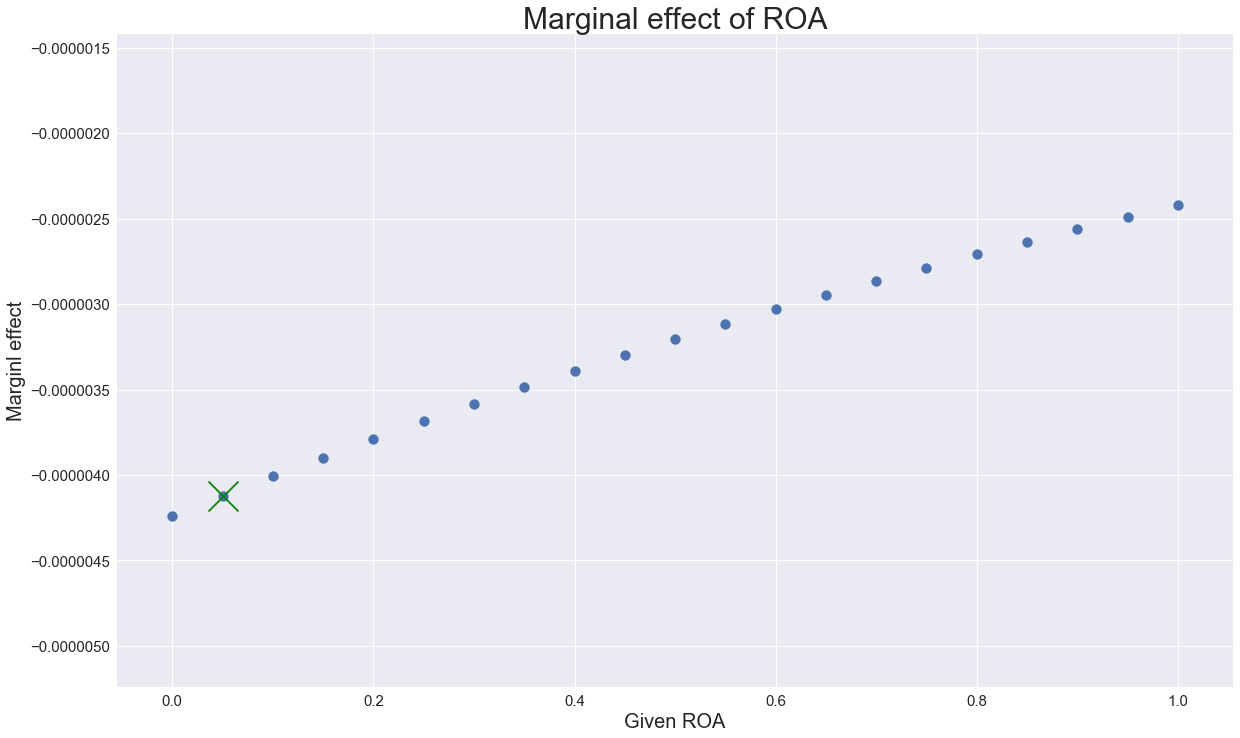

In [82]:
plt.figure(figsize=(20, 12))
plt.style.use("seaborn")
plt.scatter(np.arange(0, 1.05, 0.05),
            prediction_logit,
            s=10**2)
plt.ylim(min(prediction_logit)-0.000001, max(prediction_logit)+0.000001)
plt.title("Marginal effect of ROA", size=30)
plt.xlabel("Given ROA", size=20)
plt.ylabel("Marginl effect", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.scatter(0.05, prediction_logit[1], marker="x", s=30**2, c="green");

### 9. Following the previous question, what is the marginal effect of ROA if you estimate with the probit model?

In [25]:
from statsmodels.discrete.discrete_model import Probit
from scipy.stats import norm

In [26]:
probit_model = Probit(Y, X, missing="drop")
probit_model_result = probit_model.fit()

pd.DataFrame(probit_model_result.params, columns=["coffecient"]).T

Optimization terminated successfully.
         Current function value: 0.006106
         Iterations 12


,const,RSize,ExRET,Sigma,ROA,DR,CR,ATTNVR,CFAT
coffecient,-8.19509,-0.339248,-1.501361,3.90778,-0.246895,1.061034,0.017542,-0.049374,0.225417


In [27]:
print(probit_model_result.summary())

                          Probit Regression Results                           
Dep. Variable:                      Y   No. Observations:               159623
Model:                         Probit   Df Residuals:                   159614
Method:                           MLE   Df Model:                            8
Date:                Sun, 23 Dec 2018   Pseudo R-squ.:                  0.3336
Time:                        08:33:44   Log-Likelihood:                -974.63
converged:                       True   LL-Null:                       -1462.5
                                        LLR p-value:                2.502e-205
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.1951      0.380    -21.577      0.000      -8.939      -7.451
RSize         -0.3392      0.030    -11.481      0.000      -0.397      -0.281
ExRET         -1.5014      0.491     -3.056      0.0

In [28]:
value_of_function = np.dot(probit_model_result.params.values, x.values[0])
marginal_effect_probit = norm.pdf(value_of_function) * probit_model_result.params["ROA"]

print("marginal effect of ROA (probit): ", marginal_effect_probit)

marginal effect of ROA (probit):  -2.92620873613e-06


**Visualization**

In [66]:
def predict_probit(ROA):
    x = pd.DataFrame([[1, -6.02, -0.5277, 0.071, ROA, 0.55, 1.5, 0.67, -0.21]],
                     columns = X.columns)
    
    value_of_function = np.dot(probit_model_result.params.values, x.values[0])
    marginal_effect_probit = norm.pdf(value_of_function) * probit_model_result.params["ROA"]
    return marginal_effect_probit

In [67]:
prediction_probit = []
for i in np.arange(0, 1.05, 0.05):
    prediction_probit.append(predict_probit(i))

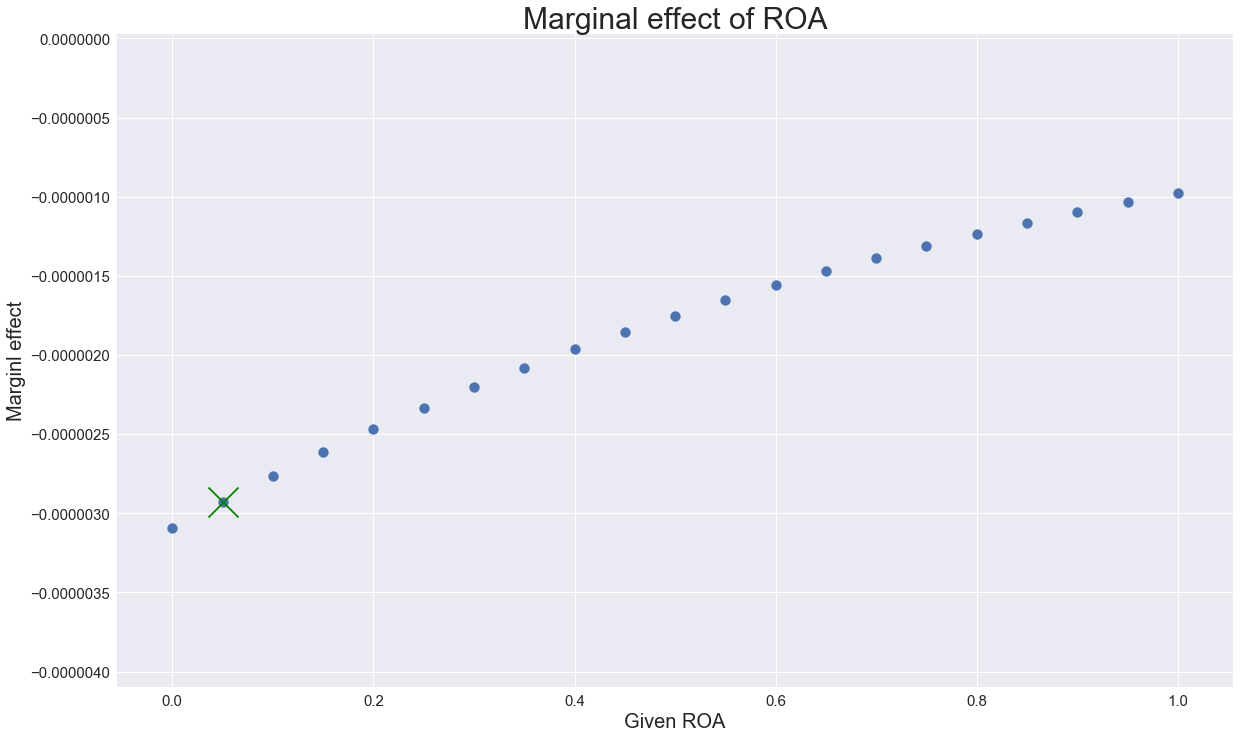

In [83]:
plt.figure(figsize=(20, 12))
plt.style.use("seaborn")
plt.scatter(np.arange(0, 1.05, 0.05),
            prediction_probit,
            s=10**2)
plt.ylim(min(prediction_probit)-0.000001, max(prediction_probit)+0.000001)
plt.title("Marginal effect of ROA", size=30)
plt.xlabel("Given ROA", size=20)
plt.ylabel("Marginl effect", size=20)
plt.xticks(size=15)
plt.yticks(size=15)
plt.scatter(0.05, prediction_probit[1], marker="x", s=30**2, c="green");

### 10. In another thread of research someone argues that the relative size (RSize) is determined by those other independent variables you see in the Shumway (2001) model above. That is,
![capture](https://i.imgur.com/sKTnErv.png)
### This is a classical panel data case. Can you run both fixed and random effects models and show me the results? (Just one-way fixed- and random-effects models) Would you suggest using a random effects model here?

**Data preprocessing**

In [84]:
# select data whose length bigger than one
target_index = data.groupby("PERMNO").count()["FYEAR"] > 1
target_index = target_index.index[target_index]

data_2 = data[data.PERMNO.apply(lambda x: x in target_index)]

# transform dataframe structure before fitting model
data_2 = add_constant(data_2)
data_2 = data_2.set_index('PERMNO', append=True)
data_2.index = data_2.index.swaplevel(0,1)

columns_with_const = ['const', 'ExRET', 'Sigma', 'ROA', 'DR', 'CR', 'ATTNVR', 'CFAT']
columns_without_const = ['ExRET', 'Sigma', 'ROA', 'DR', 'CR', 'ATTNVR', 'CFAT']

**Fixed effect model (one way)**

In [85]:
fixed_effect_one_way_model = PanelOLS(data_2["RSize"],
                                      data_2[columns_with_const],
                                      entity_effects=True)
fixed_effect_one_way_result = fixed_effect_one_way_model.fit()
print(fixed_effect_one_way_result.summary)

                          PanelOLS Estimation Summary                           
Dep. Variable:                  RSize   R-squared:                        0.3178
Estimator:                   PanelOLS   R-squared (Between):              0.2712
No. Observations:              158250   R-squared (Within):               0.3178
Date:                Sun, Dec 23 2018   R-squared (Overall):              0.2759
Time:                        10:29:59   Log-likelihood                -1.548e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      9670.2
Entities:                       12945   P-value                           0.0000
Avg Obs:                       12.225   Distribution:                F(7,145298)
Min Obs:                       2.0000                                           
Max Obs:                       58.000   F-statistic (robust):             9670.2
                            

**Random effect model**

In [86]:
random_effect_model = RandomEffects(data_2["RSize"], data_2[columns_with_const])
random_effect_result = random_effect_model.fit()
print(random_effect_result.summary)

                        RandomEffects Estimation Summary                        
Dep. Variable:                  RSize   R-squared:                        0.6309
Estimator:              RandomEffects   R-squared (Between):              0.3452
No. Observations:              158250   R-squared (Within):               0.3166
Date:                Sun, Dec 23 2018   R-squared (Overall):              0.2612
Time:                        10:41:23   Log-likelihood                -1.638e+05
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   3.865e+04
Entities:                       12945   P-value                           0.0000
Avg Obs:                       12.225   Distribution:                F(7,158242)
Min Obs:                       2.0000                                           
Max Obs:                       58.000   F-statistic (robust):          1.061e+04
                            

In [ ]:
data_2["RSize"]
data_2[columns_with_const]

In [113]:
YY = data['RSize']
XX = data[['ExRET', 'Sigma', 'ROA', 'DR', 'CR', 'ATTNVR', 'CFAT']]

XX = add_constant(X)

In [114]:
linear_probability_model_2 = OLS(YY, XX, missing="drop")
linear_probability_model_2_result = linear_probability_model_2.fit()

pd.DataFrame(linear_probability_model_2_result.params, columns=["coffecient"]).T

,const,RSize,ExRET,Sigma,ROA,DR,CR,ATTNVR,CFAT
coffecient,7.549517e-15,1.0,1.126876e-14,-7.105427e-14,-3.747003e-15,4.718448e-15,5.828671e-16,-1.887379e-15,-9.769963e-15


In [90]:
from statsmodels.sandbox.regression.gmm import IVRegressionResults

In [105]:
test = IVRegressionResults(fixed_effect_one_way_result, fixed_effect_one_way_result.params)

In [ ]:
fixed_effect_one_way_model.exog

In [109]:
fixed_effect_one_way_model.dependent

In [110]:
def spec_hausman(model, dof=None):
    endog, exog = model.dependent, model.exog
    resols = OLS(endog, exog).fit()
    normalized_cov_params_ols = resols.model.normalized_cov_params
    # Stata `ivendog` doesn't use df correction for se
    #se2 = resols.mse_resid #* resols.df_resid * 1. / len(endog)
    se2 = resols.ssr / len(endog)

    params_diff = self.params - resols.params

    cov_diff = np.linalg.pinv(model.xhatprod) - normalized_cov_params_ols
    #TODO: the following is very inefficient, solves problem (svd) twice
    #use linalg.lstsq or svd directly
    #cov_diff will very often be in-definite (singular)
    if not dof:
        dof = np.linalg.matrix_rank(cov_diff)
    cov_diffpinv = np.linalg.pinv(cov_diff)
    H = np.dot(params_diff, np.dot(cov_diffpinv, params_diff))/se2
    pval = stats.chi2.sf(H, dof)

    return H, pval, dof

In [99]:
from statsmodels.regression.linear_model import RegressionResults

In [111]:
spec_hausman(fixed_effect_one_way_model)

TypeError: object of type 'PanelData' has no len()

### 11. Some argue that it is important to include time dummies in the fixed-effects model. Please do so and compare the pooled regression, one- and two-way fixed effects models. Which is a better model?

In [234]:
fixed_effect_two_way_model = PanelOLS(data_2["RSize"],
                                      data_2[columns_with_const],
                                      time_effects=True)
fixed_effect_two_way_result = fixed_effect_two_way_model.fit()
print(fixed_effect_two_way_result.summary)

AbsorbingEffectError: 
The model cannot be estimated. The included effects have fully absorbed
one or more of the variables. This occurs when one or more of the dependent
variable is perfectly explained using the effects included in the model.


In [132]:
# pooled
selected_columns = ['const', 'ExRET', 'Sigma', 'ROA', 'DR', 'CR', 'ATTNVR', 'CFAT']
model = PanelOLS(data_2["RSize"], data_2[selected_columns])
model.fit()

Dep. Variable:,RSize,R-squared:,0.4323
Estimator:,PanelOLS,R-squared (Between):,0.4962
No. Observations:,159623,R-squared (Within):,0.4188
Date:,"Sat, Dec 22 2018",R-squared (Overall):,0.4323
Time:,15:20:18,Log-likelihood,-2.945e+05
Cov. Estimator:,Unadjusted,,
,,F-statistic:,1.737e+04
Entities:,58,P-value,0.0000
Avg Obs:,2752.1,Distribution:,"F(7,159615)"
Min Obs:,31.000,,
Max Obs:,4614.0,F-statistic (robust):,1.737e+04


https://stackoverflow.com/questions/24195432/fixed-effect-in-pandas-or-statsmodels
https://www.statsmodels.org/dev/mixed_linear.html

## Reference
* https://www.methodsconsultants.com/tutorial/what-is-the-difference-between-logit-and-probit-models/

* https://bashtage.github.io/linearmodels/doc/panel/models.html
* https://bashtage.github.io/linearmodels/doc/panel/examples/examples.html
* https://docs.google.com/document/d/1ZcSa8nhrnW6jBqV6bIX39bUUM_kjpuphiA8WeCEUdg0/edit